### GENETIC ALGORITHM PROJECT

**Project Description**

In this team project, we will design one of the well-known meta-heuristic algorithms, namely the genetic algorithm, to perform an optimization analysis. The objective of this project is to exercise the implementation of the genetic algorithm to tackle two tasks: 1) optimizing a continuous function using the algorithm and 2) solving the Traveling Salesman Problem (TSP) using the algorithm. 

### Task 1: Optimize a continuous function using the genetic algorithm

#### 1) Unconstrained Optimization

In [1]:
#importing module 
import numpy as np
import matplotlib.pyplot as plt


#### Plot of objective function

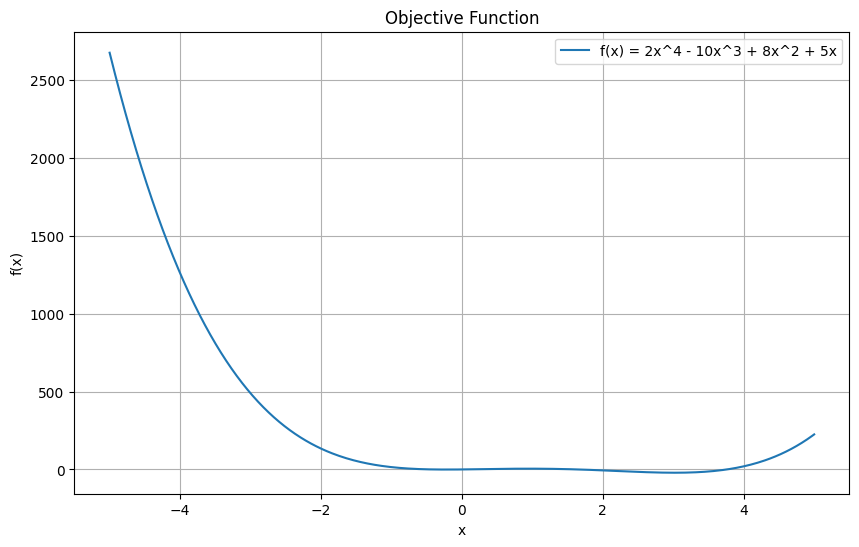

In [2]:

# Define the single variable polynomial function.
def polynomial_function(x):
    return 2 * x**4 - 10 * x**3 + 8 * x**2 + 5 * x


# Generate a range of values from -5 to 5
x_values = np.linspace(-5, 5, 400)
y_values = polynomial_function(x_values)

# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = 2x^4 - 10x^3 + 8x^2 + 5x')
plt.title('Objective Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


#### Step 1 Initialization of user defined parameters

In [3]:
# Genetic algorithm parameters.
n_bits = 16
n_iter = 1000
n_pop = 100
r_cross = 0.7
r_mut = 0.2
bounds = [-5, 5]


In [4]:
# Define the single variable polynomial function.
def polynomial_function(x):
    return 2 * x**4 - 10 * x**3 + 8 * x**2 + 5 * x

# Decode a bitstring to a number.
def decode(bitstring, bounds, n_bits):
    # Convert bitstring to a number.
    value = int(bitstring, 2)
    # Scale number to bounds.
    range = bounds[1] - bounds[0]
    return bounds[0] + (value / (2**n_bits - 1)) * range



#### Step 2 Selection

In [5]:
# Tournament selection.
def tournament_selection(pop, scores, k=3):
    # First, select k individuals randomly.
    selection_ix = np.random.randint(len(pop))
    for ix in np.random.randint(0, len(pop), k-1):
        # Perform a tournament.
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# Roulette wheel selection.
def roulette_wheel_selection(pop, scores):
    # Calculate the cumulative sum of the scores.
    selection_probs = [score / sum(scores) for score in scores]
    selection_probs_cumsum = np.cumsum(selection_probs)
    # Spin the roulette wheel.
    spin = np.random.rand()
    for i, prob in enumerate(selection_probs_cumsum):
        if spin < prob:
            return pop[i]



#### Step 3 Reproduction

In [6]:
# Crossover two parents to create two children.
def crossover(p1, p2, r_cross):
    # Children are copies of parents by default.
    c1, c2 = p1, p2
    # Check for recombination.
    if np.random.rand() < r_cross:
        # Select crossover point that is not at the ends.
        pt = np.random.randint(1, len(p1)-1)
        # Perform crossover.
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# Mutate a bitstring.
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # Check for a mutation.
        if np.random.rand() < r_mut:
            # Flip the bit.
            bitstring = bitstring[:i] + ('1' if bitstring[i] == '0' else '0') + bitstring[i+1:]
    return bitstring



#### Genetic Algorithm Function

In [7]:
# Genetic algorithm.
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut, selection_func):
    # Initial population.
    pop = [''.join(np.random.choice(['0', '1']) for _ in range(n_bits)) for _ in range(n_pop)]
    # Track the best solution.
    best, best_eval = 0, objective(decode(pop[0], bounds, n_bits))
    # Enumerate generations.
    for gen in range(n_iter):
        # Decode population and evaluate.
        decoded = [decode(p, bounds, n_bits) for p in pop]
        scores = [objective(d) for d in decoded]
        # Check for new best solution.
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = decoded[i], scores[i]
        # Select parents.
        selected = [selection_func(pop, scores) for _ in range(n_pop)]
        # Create the next generation.
        children = []
        for i in range(0, n_pop, 2):
            # Get selected parents in pairs.
            p1, p2 = selected[i], selected[i+1]
            # Crossover and mutation.
            for c in crossover(p1, p2, r_cross):
                children.append(mutation(c, r_mut))
        # Replace population.
        pop = children
    return [best, best_eval]



#### Results unconstrained function

In [8]:
# Perform genetic algorithm with tournament selection.
best_tournament, score_tournament = genetic_algorithm(polynomial_function, bounds, n_bits, n_iter, n_pop, r_cross, r_mut, tournament_selection)

# Perform genetic algorithm with roulette wheel selection.
best_roulette, score_roulette = genetic_algorithm(polynomial_function, bounds, n_bits, n_iter, n_pop, r_cross, r_mut, roulette_wheel_selection)

print("Unconstrained results with tournament selection", " x =",best_tournament, ", f(x)=", score_tournament)
print("Unconstrained Results with roulette wheel selection", " x =",best_roulette, ", f(x)=", score_roulette)

Unconstrained results with tournament selection  x = 3.0189211871519035 , f(x)= -21.009517800414002
Unconstrained Results with roulette wheel selection  x = 3.0190737773708705 , f(x)= -21.009517330132162


#### Plotting results for unconstrained optimization

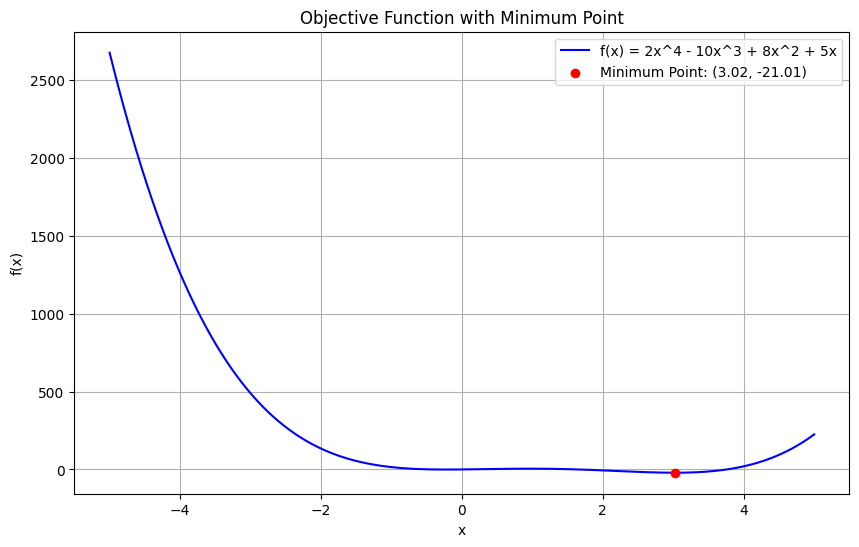

In [9]:
# Plotting the function with the minimum point found by the genetic algorithm

# Re-plotting the objective function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = 2x^4 - 10x^3 + 8x^2 + 5x', color='blue')
plt.scatter(best_tournament, score_tournament, color='red', zorder=5, label=f'Minimum Point: ({best_tournament:.2f}, {score_tournament:.2f})')
plt.title('Objective Function with Minimum Point')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

#### 2) Constrained optimization

#### Plotting the Objective Function and Constraint

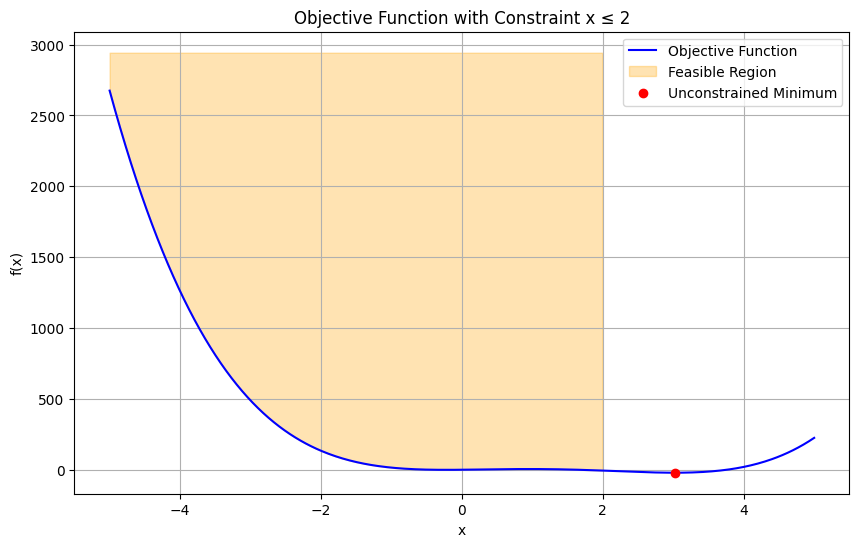

In [10]:
# Define the constraint function
def constraint(x):
    return x > 2

# Apply constraint to objective function for visualization
y_values_with_constraint = np.where(constraint(x_values), float('nan'), y_values)

# Plotting the objective function with constraint
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Objective Function', color='blue')
plt.fill_between(x_values, y_values_with_constraint, max(y_values)*1.1, where=(x_values<=2), color='orange', alpha=0.3, label='Feasible Region')
plt.scatter(best_tournament, score_tournament, color='red', zorder=5, label='Unconstrained Minimum')
plt.title('Objective Function with Constraint x ≤ 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()



#### Parameter initialization with constraint

In [11]:
# Genetic algorithm parameters.
n_bits = 16
n_iter = 1000
n_pop = 100
r_cross = 0.7
r_mut = 0.2
bounds = [-5, 5]
# Define the penalty parameter, typically a large number.
r_p = 1000000  # Penalty parameter 


#### Objective function with constraint x<=2

In [12]:
def constrained_polynomial_function(x, r_p):
    """Constrained polynomial function with a penalty for x > 2."""
    f_x = 2 * x**4 - 10 * x**3 + 8 * x**2 + 5 * x  # Original function
    g_x = x - 2  # Inequality constraint
    penalty = max(0, g_x)**2  # Penalty function
    return f_x + r_p * penalty  # Transformed objective function with penalty



#### Genetic algorithm implementation with constraint

In [13]:
# Genetic algorithm with constraint handling via penalty method.
def genetic_algorithm_with_penalty(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut, r_p, selection_func):
    # Initial population of random bitstring.
    pop = [''.join(np.random.choice(['0', '1']) for _ in range(n_bits)) for _ in range(n_pop)]
    # Track the best solution.
    decoded = [decode(p, bounds, n_bits) for p in pop]
    best, best_eval = decoded[0], objective(decoded[0], r_p)
    # Enumerate generations.
    for gen in range(n_iter):
        # Decode population and evaluate.
        decoded = [decode(p, bounds, n_bits) for p in pop]
        scores = [objective(d, r_p) for d in decoded]
        # Check for new best solution.
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = decoded[i], scores[i]
        # Select parents.
        selected = [selection_func(pop, scores) for _ in range(n_pop)]
        # Create the next generation.
        children = []
        for i in range(0, n_pop, 2):
            # Get selected parents in pairs.
            p1, p2 = selected[i], selected[i+1]
            # Crossover and mutation.
            for c in crossover(p1, p2, r_cross):
                children.append(mutation(c, r_mut))
        # Replace population.
        pop = children
    return [best, best_eval]



#### Results for constrained optimization

In [14]:

# Perform genetic algorithm with tournament selection and constraint handling.
best_tournament, score_tournament = genetic_algorithm_with_penalty(
    constrained_polynomial_function, bounds, n_bits, n_iter, n_pop, r_cross, r_mut, r_p, tournament_selection
)

# Perform genetic algorithm with roulette wheel selection and constraint handling.
best_roulette, score_roulette = genetic_algorithm_with_penalty(
    constrained_polynomial_function, bounds, n_bits, n_iter, n_pop, r_cross, r_mut, r_p, roulette_wheel_selection
)

print("Constrained results with tournament selection", " x =",best_tournament, ", f(x)=", score_tournament)
print("Constrained results with roulette wheel selection", " x =",best_roulette, ", f(x)=", score_roulette)

Constrained results with tournament selection  x = 1.9999237048905165 , f(x)= -5.99855041620626
Constrained results with roulette wheel selection  x = 1.9999237048905165 , f(x)= -5.99855041620626


#### Plotting results for constrained optimization

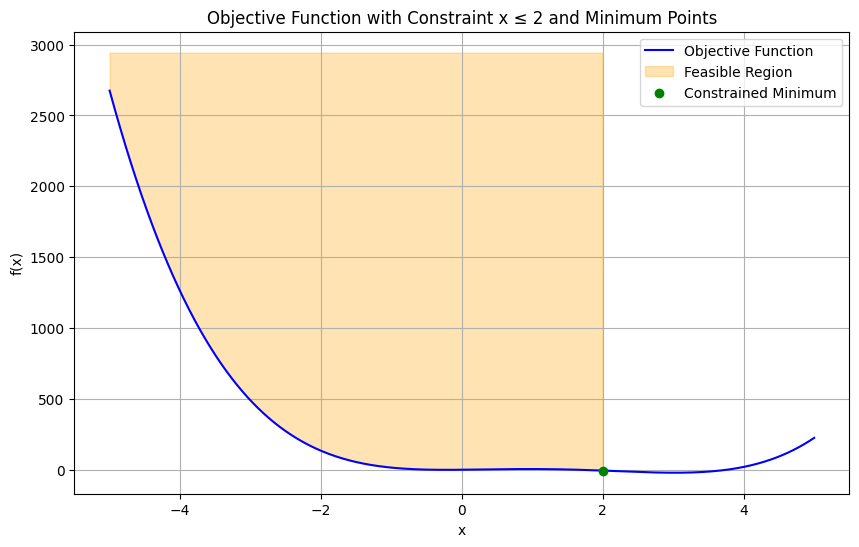

In [15]:
# Re-plotting the objective function with constraint and showing both minimum points
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Objective Function', color='blue')
plt.fill_between(x_values, y_values_with_constraint, max(y_values)*1.1, where=(x_values<=2), color='orange', alpha=0.3, label='Feasible Region')
plt.scatter(best_tournament, score_tournament, color='green', zorder=5, label='Constrained Minimum')
plt.title('Objective Function with Constraint x ≤ 2 and Minimum Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


### Task 2: Address the Traveling Salesman Problem (TSP) using the genetic algorithm


### Greedy Algorithm Approach

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Read cities data from CSV files
# Atlanta data
atlanta_data = pd.read_csv("Atlanta.csv")
# Cincinnati data
cincinnati_data = pd.read_csv("Cincinnati.csv")
# Boston data
boston_data = pd.read_csv("Boston.csv")

# Function to plot and annotate delivery points
def plot_and_annotate_delivery_points(city_data, city_name):
    """Plot and annotate delivery points with their indices for a given city.
    
    Args:
        city_data (pandas.DataFrame): Data containing delivery points (longitude and latitude).
        city_name (str): Name of the city to include in the plot title.
    """
    # Create a new figure with specific size
    plt.figure(figsize=(10, 8))
    # Plot delivery points as red dots and label them as 'Delivery points'
    plt.scatter(city_data['Longitude (deg)'], city_data['Latitude (deg)'], color='red', label='Delivery points')
    
    # Annotate each delivery point with its index (e.g., 0, 1, 2, etc.)
    for index, row in city_data.iterrows():
        # Get the longitude and latitude of the current delivery point
        longitude = row['Longitude (deg)']
        latitude = row['Latitude (deg)']
        
        # Annotate the point with its index (in black color, with offset position)
        plt.annotate(str(index), (longitude, latitude), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='black')
    
    # Set plot labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Delivery Locations in {city_name}')
    
    # Add legend and grid lines to the plot
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.show()


#### Plots showing delivery locations for three cities : Atlanta, Cincinnati and Boston

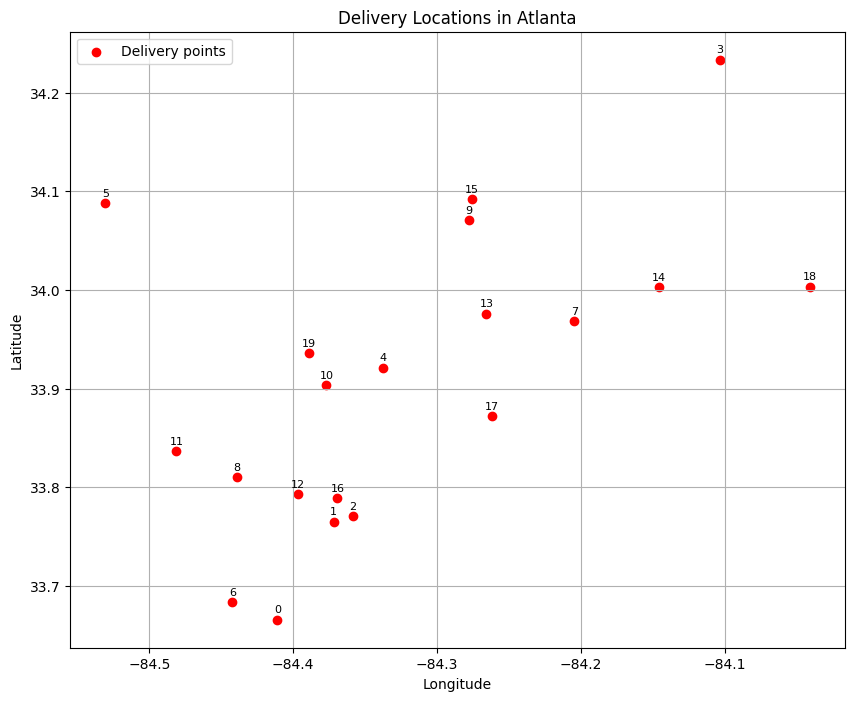

In [18]:
# Plot and annotate delivery points for Atlanta
plot_and_annotate_delivery_points(atlanta_data, 'Atlanta')

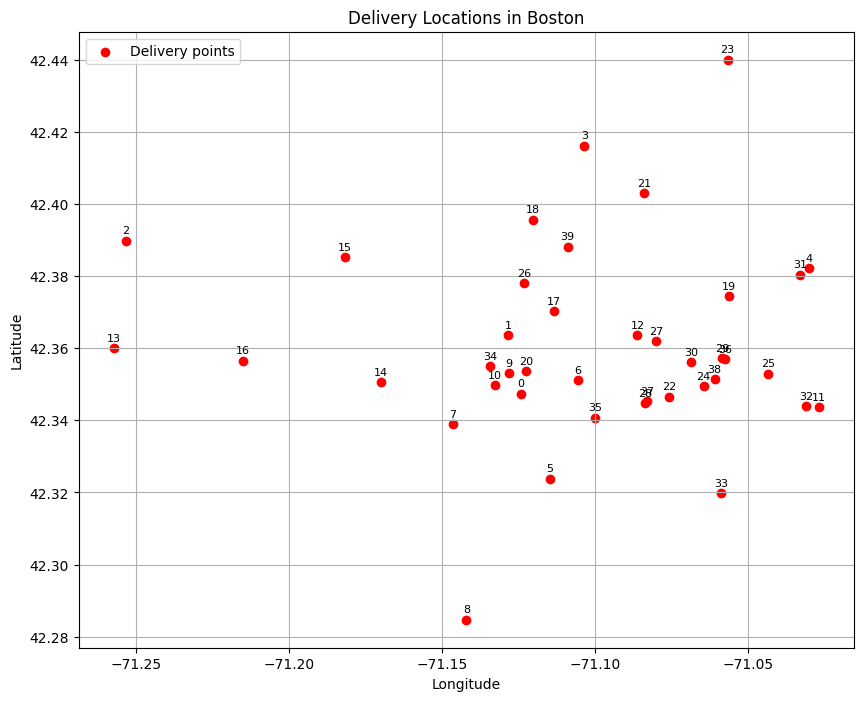

In [19]:
# Plot and annotate delivery points for Boston
plot_and_annotate_delivery_points(boston_data, 'Boston')

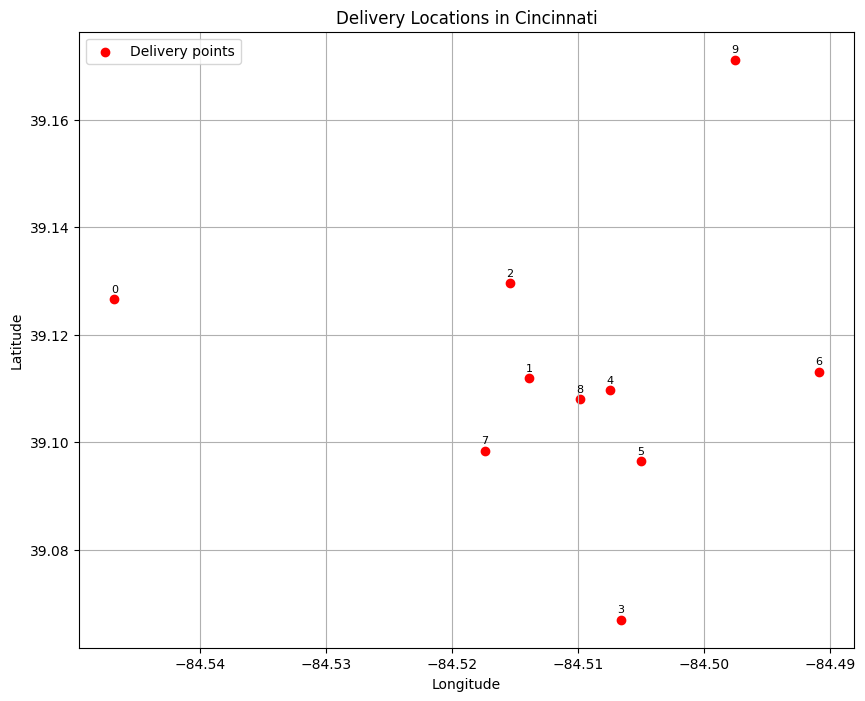

In [20]:
# Plot and annotate delivery points for Cincinnati
plot_and_annotate_delivery_points(cincinnati_data, 'Cincinnati')

#### Constructing Adjacency distance matrix

In [21]:
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Haversine distance function
def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance between two points based on their latitude and longitude.
    
    Args:
        lat1 (float): Latitude of the first point in degrees.
        lon1 (float): Longitude of the first point in degrees.
        lat2 (float): Latitude of the second point in degrees.
        lon2 (float): Longitude of the second point in degrees.
    
    Returns:
        float: Distance between the two points in meters.
    """
    R = 6371.0  # Earth's radius in kilometers

    # Convert latitudes and longitudes from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate differences in longitude and latitude
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Calculate the Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculate distance in meters
    distance = R * c * 1000  # Convert distance from kilometers to meters
    return distance

# Construct distance matrix function
def construct_distance_matrix(city_data):
    """Construct a distance adjacency matrix for the given city data.
    
    Args:
        city_data (pandas.DataFrame): Data containing delivery points with 'Latitude (deg)' and 'Longitude (deg)' columns.
    
    Returns:
        np.ndarray: 2D array representing the distance matrix.
    """
    # Get the number of delivery points
    num_points = len(city_data)
    
    # Initialize an empty distance matrix with zeros
    distance_matrix = np.zeros((num_points, num_points))
    
    # Calculate distances between each pair of delivery points
    for i in range(num_points):
        # Get latitude and longitude of point i
        lat1 = city_data.loc[i, 'Latitude (deg)']
        lon1 = city_data.loc[i, 'Longitude (deg)']
        
        for j in range(num_points):
            # Get latitude and longitude of point j
            lat2 = city_data.loc[j, 'Latitude (deg)']
            lon2 = city_data.loc[j, 'Longitude (deg)']
            
            # Calculate the distance between point i and point j
            distance = haversine_distance(lat1, lon1, lat2, lon2)
            
            # Store the calculated distance in the distance matrix
            distance_matrix[i, j] = distance
    
    return distance_matrix

# Construct distance adjacency matrix for Atlanta
atlanta_distance_matrix = construct_distance_matrix(atlanta_data)

# Print the distance adjacency matrix for Atlanta
print("Distance Adjacency Matrix for Atlanta:")
print(atlanta_distance_matrix)


Distance Adjacency Matrix for Atlanta:
[[    0.         11630.77995703 12676.05505068 69228.23081847
  29217.96969868 48212.39183791  3485.52557028 38713.60403003
  16259.17597341 46724.02334563 26629.79403074 20102.81361883
  14219.72187139 37016.44016516 44783.68619058 49027.59872354
  14206.82157367 26801.47420973 50780.15692294 30141.94617408]
 [11630.77995703     0.          1387.68825977 57672.66196884
  17652.41275691 38758.93808491 11195.65412504 27403.2962958
   7967.79535396 35113.43520573 15399.71167065 12875.29288477
   3867.40499084 25409.91275678 33675.82103202 37424.93756051
   2631.51507617 15673.05353634 40437.22759353 19088.54690575]
 [12676.05505068  1387.68825977     0.         56558.53207149
  16816.59364375 38631.23338414 12458.74714    26177.39165856
   8597.05553561 34186.1754156  14827.66245364 13482.37106331
   4287.63838752 24344.91890117 32406.51130161 36508.92462739
   2192.21166165 14386.73566226 39083.87632693 18573.72166578]
 [69228.23081847 57672.661968

In [22]:
# For Boston
boston_distance_matrix = construct_distance_matrix(boston_data)
print("Distance Adjacency Matrix for Boston:")
print(boston_distance_matrix)

Distance Adjacency Matrix for Boston:
[[    0.          1843.04339417 11618.59814375 ...  3395.07664966
   5222.74238863  4708.28725494]
 [ 1843.04339417     0.         10680.80056865 ...  4251.31723722
   5707.46329156  3157.28557547]
 [11618.59814375 10680.80056865     0.         ... 14854.32529298
  16385.98728672 11868.61840502]
 ...
 [ 3395.07664966  4251.31723722 14854.32529298 ...     0.
   1941.26988934  5230.17663315]
 [ 5222.74238863  5707.46329156 16385.98728672 ...  1941.26988934
      0.          5687.02287904]
 [ 4708.28725494  3157.28557547 11868.61840502 ...  5230.17663315
   5687.02287904     0.        ]]


In [23]:
# For Cincinnati
cincinnati_distance_matrix = construct_distance_matrix(cincinnati_data)
print("Distance Adjacency Matrix for Cincinnati:")
print(cincinnati_distance_matrix)

Distance Adjacency Matrix for Cincinnati:
[[    0.          3277.69459128  2730.08910763  7486.63624729
   3885.7170309   4920.87578599  5054.95949915  4030.74278665
   3802.53783026  6527.87279239]
 [ 3277.69459128     0.          1965.20162069  5041.56532738
    609.96048874  1878.48584516  1987.45581165  1532.966353
    558.42545179  6734.49554764]
 [ 2730.08910763  1965.20162069     0.          7004.45421879
   2321.00297344  3784.59133297  2799.43154966  3466.97996991
   2445.05524214  4874.79813826]
 [ 7486.63624729  5041.56532738  7004.45421879     0.
   4746.37985973  3289.08700784  5306.43089065  3623.12619763
   4574.31969142 11614.32733565]
 [ 3885.7170309    609.96048874  2321.00297344  4746.37985973
      0.          1474.66460993  1480.74529429  1513.72667387
    272.9592074   6895.41887347]
 [ 4920.87578599  1878.48584516  3784.59133297  3289.08700784
   1474.66460993     0.          2210.72046908  1092.38495317
   1345.394331    8326.75717757]
 [ 5054.95949915  1987.455

### Greedy Algorithm Function

In [24]:
# Greedy algorithm for nearest neighbor selection
def greedy_algorithm(city_data, start_index=0):
    """Find the optimal route using a greedy algorithm based on nearest neighbor selection.
    
    Args:
        city_data (pandas.DataFrame): Data containing delivery points.
        start_index (int): Index of the starting delivery point. Default is 0.
    
    Returns:
        list: Optimal route in the order of visited delivery points, starting and ending at the same point.
    """
    # Number of delivery points
    num_points = len(city_data)
    
    # Track visited delivery points
    visited = set()
    visited.add(start_index)  # Start at the specified starting point
    
    # List to store the optimal route
    optimal_route = [start_index]
    
    # Current city index starts at the specified starting point
    current_city_index = start_index
    
    # Visit nearest neighbors until all delivery points are visited
    while len(visited) < num_points:
        # Get the current city's latitude and longitude
        current_city = city_data.iloc[current_city_index]
        current_lat = current_city['Latitude (deg)']
        current_lon = current_city['Longitude (deg)']
        
        # Initialize variables to track the nearest neighbor
        nearest_distance = float('inf')
        nearest_neighbor_index = None
        
        # Iterate through all delivery points to find the nearest unvisited neighbor
        for index in range(num_points):
            if index not in visited:
                # Get latitude and longitude of the neighbor point
                neighbor_city = city_data.iloc[index]
                neighbor_lat = neighbor_city['Latitude (deg)']
                neighbor_lon = neighbor_city['Longitude (deg)']
                
                # Calculate distance from the current point to the neighbor point
                distance = haversine_distance(current_lat, current_lon, neighbor_lat, neighbor_lon)
                
                # Update the nearest neighbor and distance if necessary
                if distance < nearest_distance:
                    nearest_distance = distance
                    nearest_neighbor_index = index
        
        # Add the nearest neighbor to the optimal route
        optimal_route.append(nearest_neighbor_index)
        visited.add(nearest_neighbor_index)  # Mark neighbor as visited
        
        # Update current city index
        current_city_index = nearest_neighbor_index
    
    # Return to the starting point to complete the tour
    optimal_route.append(start_index)
    
    return optimal_route

# Compute total distance of the optimal route
def compute_total_distance(optimal_route, city_data):
    """Compute the total distance of the optimal route.
    
    Args:
        optimal_route (list): Optimal route in the order of visited delivery points.
        city_data (pandas.DataFrame): Data containing delivery points.
    
    Returns:
        float: Total distance of the optimal route in meters.
    """
    total_distance = 0
    
    # Iterate through each pair of consecutive cities in the optimal route
    for i in range(len(optimal_route) - 1):
        # Get indices of the current city and the next city in the optimal route
        city1_index = optimal_route[i]
        city2_index = optimal_route[i + 1]
        
        # Get latitude and longitude of the two cities
        city1 = city_data.iloc[city1_index]
        city2 = city_data.iloc[city2_index]
        
        # Calculate distance between the two cities using the Haversine formula
        distance = haversine_distance(city1['Latitude (deg)'], city1['Longitude (deg)'],
                                      city2['Latitude (deg)'], city2['Longitude (deg)'])
        
        # Add the distance to the total distance
        total_distance += distance
    
    return total_distance

# Plot the optimized route and annotate each point
def plot_optimized_route(city_data, optimal_route):
    """Plot the optimized route and annotate each point with its index.
    
    Args:
        city_data (pandas.DataFrame): Data containing delivery points.
        optimal_route (list): Optimal route in the order of visited delivery points.
    """
    plt.figure(figsize=(10, 8))
    
    # Plot the delivery points on the map
    plt.scatter(city_data['Longitude (deg)'], city_data['Latitude (deg)'], label='Delivery points', color='blue')
    
    # Annotate each delivery point with its index
    for index, row in city_data.iterrows():
        plt.annotate(str(index), (row['Longitude (deg)'], row['Latitude (deg)']), textcoords='offset points', xytext=(0, 5), ha='center')
    
    # Plot lines connecting the delivery points in the optimal route
    for i in range(len(optimal_route) - 1):
        # Get indices of consecutive delivery points in the optimal route
        city1_index = optimal_route[i]
        city2_index = optimal_route[i + 1]
        
        # Get the longitude and latitude of the two points
        city1 = city_data.iloc[city1_index]
        city2 = city_data.iloc[city2_index]
        
        # Plot the line connecting the two points
        plt.plot([city1['Longitude (deg)'], city2['Longitude (deg)']],
                 [city1['Latitude (deg)'], city2['Latitude (deg)']], color='red')
    
    # Set plot labels and title
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.title('Optimized Route')
    
    # Add legend and grid lines to the plot
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.show()


#### Results for Atlanta using Greedy Algorithm

Total distance of the optimal route: 231982.39 meters
Optimized path (indices of delivery points in order):
[0, 6, 1, 2, 16, 12, 8, 11, 10, 19, 4, 17, 13, 7, 14, 18, 9, 15, 3, 5, 0]


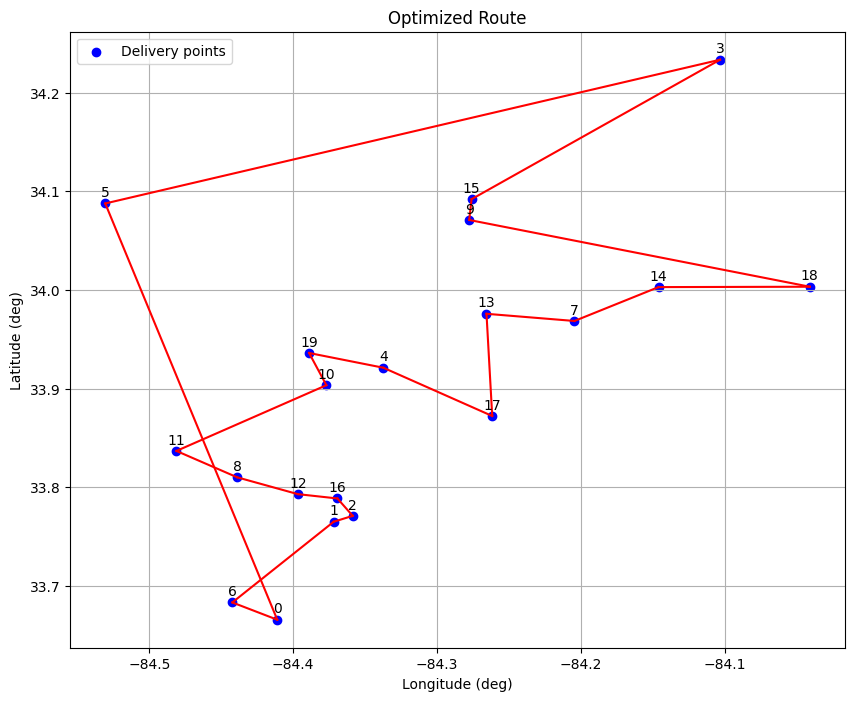

In [25]:
#Atlanta
# Find the optimal route using the greedy algorithm from the starting point 0
optimal_route = greedy_algorithm(atlanta_data, start_index=0)

# Compute the total distance of the optimal route
total_distance = compute_total_distance(optimal_route, atlanta_data)
print(f"Total distance of the optimal route: {total_distance:.2f} meters")

# Print the optimized path (indices of delivery points)
print("Optimized path (indices of delivery points in order):")
print(optimal_route)

# Plot the optimized route and annotate each point
plot_optimized_route(atlanta_data, optimal_route)

#### Results for Boston using Greedy Algorithm¶

Total distance of the optimal route: 101809.03 meters
Optimized path (indices of delivery points in order):
[0, 9, 20, 10, 34, 1, 17, 26, 39, 18, 3, 21, 19, 29, 36, 38, 24, 30, 27, 12, 37, 28, 22, 35, 6, 5, 7, 14, 16, 13, 2, 15, 8, 33, 32, 11, 25, 31, 4, 23, 0]


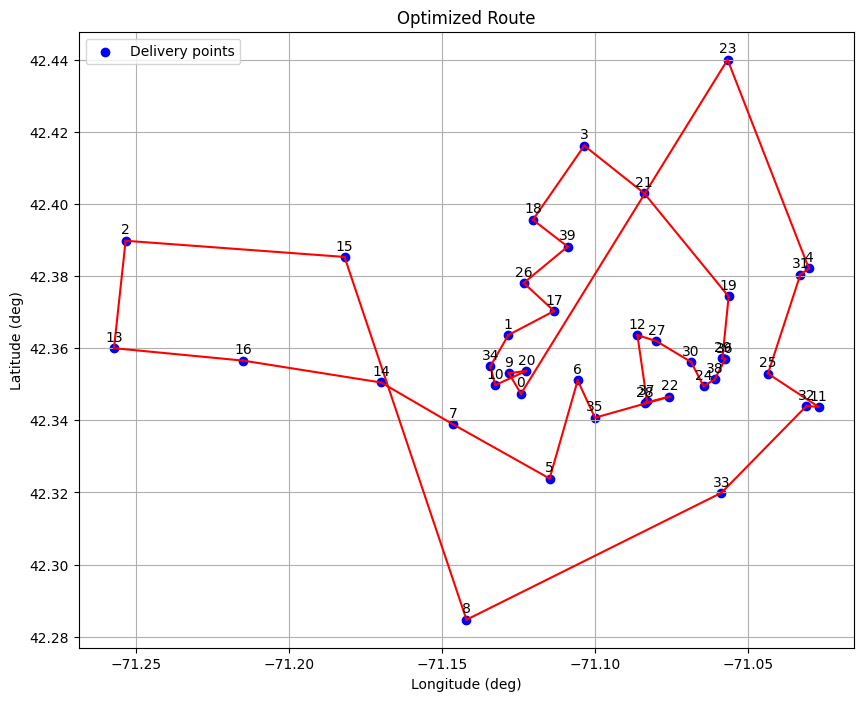

In [26]:
#Boston
# Find the optimal route using the greedy algorithm from the starting point 0
optimal_route = greedy_algorithm(boston_data, start_index=0)

# Compute the total distance of the optimal route
total_distance = compute_total_distance(optimal_route, boston_data)
print(f"Total distance of the optimal route: {total_distance:.2f} meters")

# Print the optimized path (indices of delivery points)
print("Optimized path (indices of delivery points in order):")
print(optimal_route)

# Plot the optimized route and annotate each point
plot_optimized_route(boston_data, optimal_route)

#### Results for Cincinnati using Greedy Algorithm¶

Total distance of the optimal route: 34353.54 meters
Optimized path (indices of delivery points in order):
[0, 2, 1, 8, 4, 5, 7, 6, 3, 9, 0]


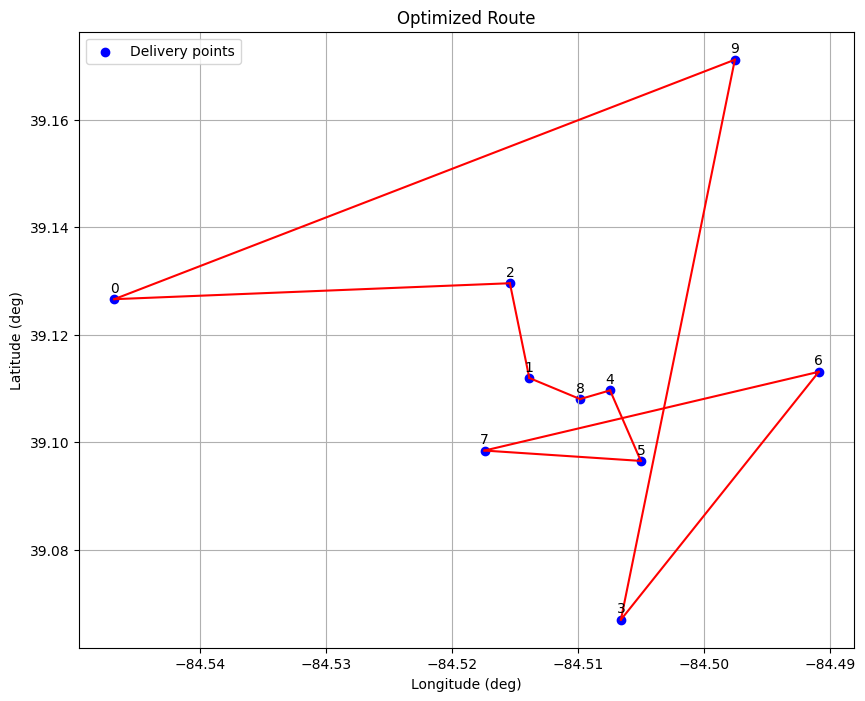

In [27]:
#Cincinnati
# Find the optimal route using the greedy algorithm from the starting point 0
optimal_route = greedy_algorithm(cincinnati_data, start_index=0)

# Compute the total distance of the optimal route
total_distance = compute_total_distance(optimal_route, cincinnati_data)
print(f"Total distance of the optimal route: {total_distance:.2f} meters")

# Print the optimized path (indices of delivery points)
print("Optimized path (indices of delivery points in order):")
print(optimal_route)

# Plot the optimized route and delivery points for Cincinnati
plot_optimized_route(cincinnati_data, optimal_route)

### Genetic Algorithm Approach

#### Results for Atlanta using Genetic algorithm

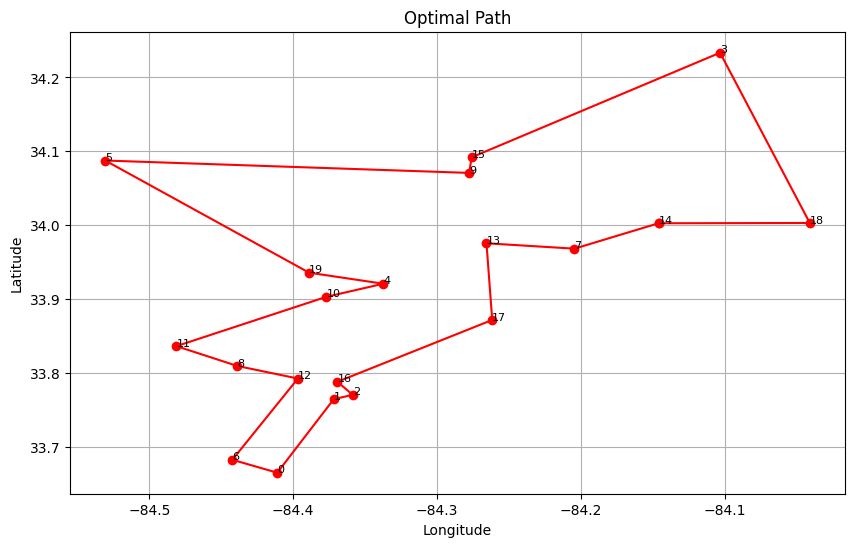

Population Size: 300
Number of Generations: 1000
Mutation Rate: 0.4
Crossover Rate: 0.95

Optimal Path: [14, 18, 3, 15, 9, 5, 19, 4, 10, 11, 8, 12, 6, 0, 1, 2, 16, 17, 13, 7]
Estimated Total Distance: 198367.23 meters


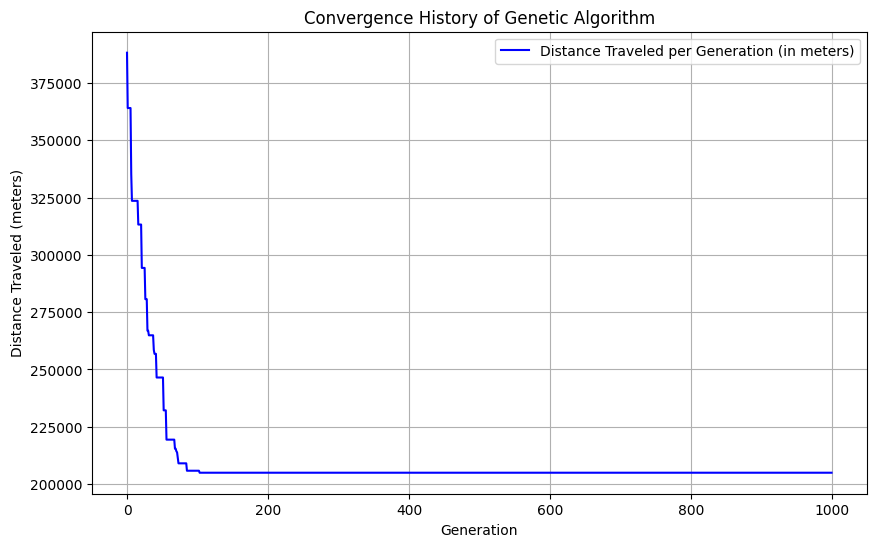

In [28]:
# Import necessary modules for the algorithm
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

# Set a random seed for reproducibility so that the same random sequences can be generated each time for comparison
random.seed(42)

# Function to load city coordinates from a CSV file and return a dictionary with city names as keys and coordinates as values
def load_city_coordinates(filename):
    data = pd.read_csv(filename)
    return {row[0]: (row[1], row[2]) for row in data.itertuples(index=False)}

# Function to calculate the haversine distance between two cities given their latitude and longitude
def haversine_distance(city1, city2):
    # Earth's radius in meters
    R = 6371.0 * 1000
    
    # Unpack latitude and longitude and convert them from degrees to radians
    lat1, lon1 = city1
    lat2, lon2 = city2
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Calculate haversine distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Function to create a random individual, i.e., a sequence of cities representing a route
def create_individual(city_keys):
    return random.sample(city_keys, len(city_keys))

# Function to mutate an individual by swapping two cities in the route
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Function to perform crossover between two parent routes to produce a new route (child)
def crossover(parent1, parent2):
    # Choose two points to perform crossover
    idx1, idx2 = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[idx1:idx2] = parent1[idx1:idx2]
    child_pointer = 0
    # Fill in the rest of the child's route with cities from the second parent that aren't already in the child's route
    for gene in parent2:
        if gene not in child:
            while child[child_pointer] is not None:
                child_pointer += 1
            child[child_pointer] = gene
    return child

# Main function for the genetic algorithm
def genetic_algorithm(filename, population_size=100, num_generations=1000, mutation_rate=0.1, crossover_rate=0.8):
    # Load cities and their coordinates
    cities = load_city_coordinates(filename)
    city_keys = list(cities.keys())

    # Define a function to calculate the total distance of a route (used as the fitness function in this context)
    def tsp_distance(individual):
        total_distance = 0
        # Sum distances for all legs of the journey
        for i in range(len(individual) - 1):
            total_distance += haversine_distance(cities[individual[i]], cities[individual[i+1]])
        # Add the distance from the last city back to the first to complete the cycle
        total_distance += haversine_distance(cities[individual[-1]], cities[individual[0]])
        return total_distance

    # Initialize the population with random routes
    population = [create_individual(city_keys) for _ in range(population_size)]
    distance_history = []

    # Start the main loop of the genetic algorithm
    for generation in range(num_generations):
        # Sort the population by the distance of the route (ascending order)
        population = sorted(population, key=tsp_distance)
        # Select the top half of the routes to create new routes from
        new_population = population[:population_size // 2]
        
        # Generate new individuals (routes) to fill the rest of the population using crossover and mutation
        while len(new_population) < population_size:
            # Select two parents randomly
            parent1, parent2 = random.sample(population, 2)
            # Apply crossover and mutation to generate a new child route
            if random.random() < crossover_rate:
                child = crossover(parent1, parent2)
                if random.random() < mutation_rate:
                    child = mutate(child)
            else:
                child = parent1 if tsp_distance(parent1) < tsp_distance(parent2) else parent2
            new_population.append(child)

        # The new population becomes the current population for the next generation
        population = new_population
        
        # Record the shortest distance (best fitness) in this generation
        best_individual = population[0]
        best_distance = tsp_distance(best_individual)
        distance_history.append(best_distance)

    # Return the best route found, the city coordinates, and the history of best distances
    return sorted(population, key=tsp_distance)[0], cities, distance_history

# Function to plot the route on a map using matplotlib
def plot_route(best_individual, cities):
    # Add the starting city to the end of the route to create a closed loop for plotting
    optimal_route_cyclic = best_individual + [best_individual[0]]
    # Extract the x (longitude) and y (latitude) values for plotting
    x_values = [cities[city][1] for city in optimal_route_cyclic]  # Swapped x and y here for longitude
    y_values = [cities[city][0] for city in optimal_route_cyclic]  # Swapped x and y here for latitude
    
    # Plotting the route
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, 'ro-')  # 'ro-' specifies red color, circle markers, and solid lines
    # Annotate each city with its name
    for city, (lat, lon) in cities.items():
        plt.text(lon, lat, city, fontsize=8)  # Swapped the order here for longitude and latitude
    plt.title("Optimal Path")
    plt.xlabel("Longitude")  # Correct axis label for longitude
    plt.ylabel("Latitude")  # Correct axis label for latitude
    plt.grid(True)  # Enable grid for easier readability
    plt.show()

# Configuration parameters and execution of the genetic algorithm
filename = "Atlanta.csv"
population_size = 300
num_generations = 1000
mutation_rate = 0.4
crossover_rate = 0.95

# Running the genetic algorithm to find the best route
best_individual, cities, distance_history = genetic_algorithm(filename, population_size, num_generations, mutation_rate, crossover_rate)
# Plotting the optimal route found by the genetic algorithm
plot_route(best_individual, cities)

# Calculate the total distance of the optimal route
total_distance = sum(haversine_distance(cities[best_individual[i]], cities[best_individual[i+1]]) for i in range(len(best_individual)-1))

# Print algorithm parameters and results
print("Population Size:", population_size)
print("Number of Generations:", num_generations)
print("Mutation Rate:", mutation_rate)
print("Crossover Rate:", crossover_rate)
print("\nOptimal Path:", best_individual)
print("Estimated Total Distance: {:.2f} meters".format(total_distance))

# Plotting the convergence history of the algorithm (distance vs. number of iterations)
plt.figure(figsize=(10, 6))
plt.plot(distance_history, 'b-', label='Distance Traveled per Generation (in meters)')
plt.title('Convergence History of Genetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('Distance Traveled (meters)')
plt.legend()  # Show legend to label the plot
plt.grid(True)  # Enable grid for easier readability
plt.show()

#### Results for Boston using Genetic algorithm

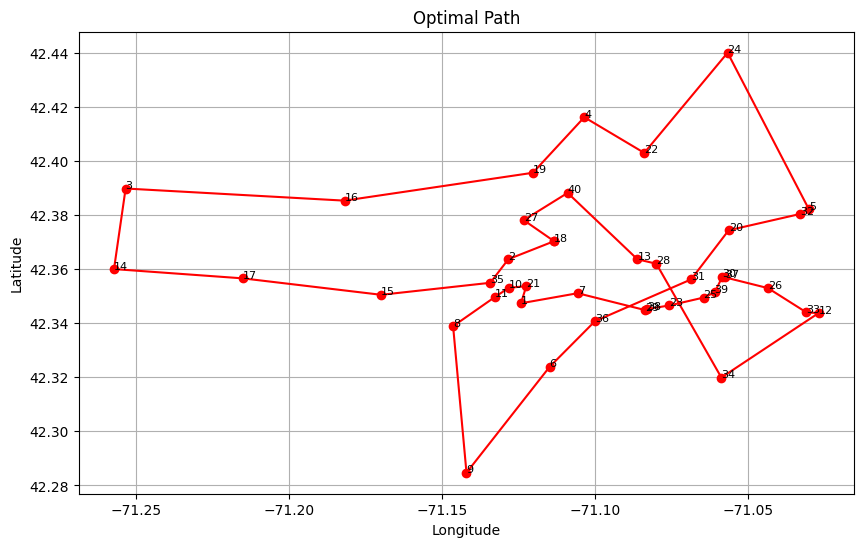

Population Size: 300
Number of Generations: 3000
Mutation Rate: 0.4
Crossover Rate: 0.95

Optimal Path: [18, 2, 35, 15, 17, 14, 3, 16, 19, 4, 22, 24, 5, 32, 20, 31, 36, 6, 9, 8, 11, 10, 21, 1, 7, 29, 38, 23, 25, 39, 30, 37, 26, 33, 12, 34, 28, 13, 40, 27]
Estimated Total Distance: 91209.14 meters


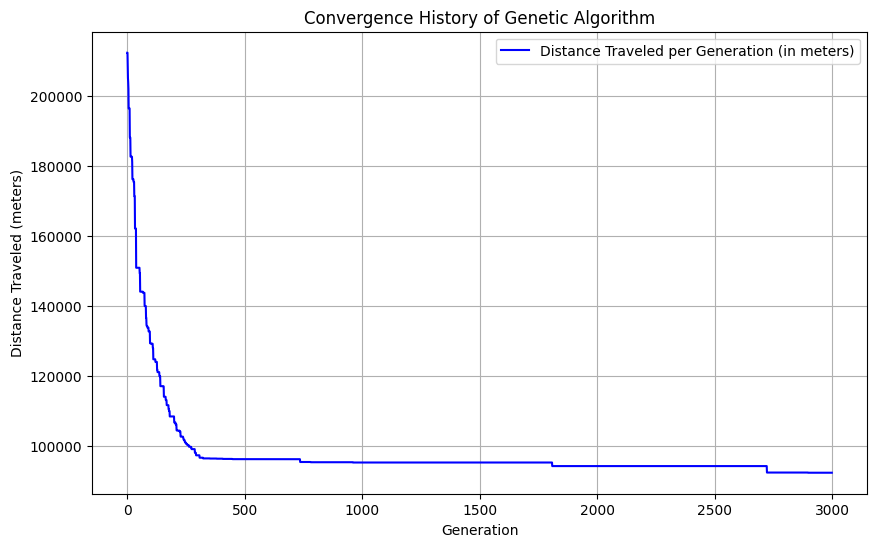

In [29]:
# Import necessary modules for the algorithm
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

# Set a random seed for reproducibility so that the same random sequences can be generated each time for comparison
random.seed(42)

# Function to load city coordinates from a CSV file and return a dictionary with city names as keys and coordinates as values
def load_city_coordinates(filename):
    data = pd.read_csv(filename)
    return {row[0]: (row[1], row[2]) for row in data.itertuples(index=False)}

# Function to calculate the haversine distance between two cities given their latitude and longitude
def haversine_distance(city1, city2):
    # Earth's radius in meters
    R = 6371.0 * 1000
    
    # Unpack latitude and longitude and convert them from degrees to radians
    lat1, lon1 = city1
    lat2, lon2 = city2
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Calculate haversine distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Function to create a random individual, i.e., a sequence of cities representing a route
def create_individual(city_keys):
    return random.sample(city_keys, len(city_keys))

# Function to mutate an individual by swapping two cities in the route
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Function to perform crossover between two parent routes to produce a new route (child)
def crossover(parent1, parent2):
    # Choose two points to perform crossover
    idx1, idx2 = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[idx1:idx2] = parent1[idx1:idx2]
    child_pointer = 0
    # Fill in the rest of the child's route with cities from the second parent that aren't already in the child's route
    for gene in parent2:
        if gene not in child:
            while child[child_pointer] is not None:
                child_pointer += 1
            child[child_pointer] = gene
    return child

# Main function for the genetic algorithm
def genetic_algorithm(filename, population_size=100, num_generations=1000, mutation_rate=0.1, crossover_rate=0.8):
    # Load cities and their coordinates
    cities = load_city_coordinates(filename)
    city_keys = list(cities.keys())

    # Define a function to calculate the total distance of a route (used as the fitness function in this context)
    def tsp_distance(individual):
        total_distance = 0
        # Sum distances for all legs of the journey
        for i in range(len(individual) - 1):
            total_distance += haversine_distance(cities[individual[i]], cities[individual[i+1]])
        # Add the distance from the last city back to the first to complete the cycle
        total_distance += haversine_distance(cities[individual[-1]], cities[individual[0]])
        return total_distance

    # Initialize the population with random routes
    population = [create_individual(city_keys) for _ in range(population_size)]
    distance_history = []

    # Start the main loop of the genetic algorithm
    for generation in range(num_generations):
        # Sort the population by the distance of the route (ascending order)
        population = sorted(population, key=tsp_distance)
        # Select the top half of the routes to create new routes from
        new_population = population[:population_size // 2]
        
        # Generate new individuals (routes) to fill the rest of the population using crossover and mutation
        while len(new_population) < population_size:
            # Select two parents randomly
            parent1, parent2 = random.sample(population, 2)
            # Apply crossover and mutation to generate a new child route
            if random.random() < crossover_rate:
                child = crossover(parent1, parent2)
                if random.random() < mutation_rate:
                    child = mutate(child)
            else:
                child = parent1 if tsp_distance(parent1) < tsp_distance(parent2) else parent2
            new_population.append(child)

        # The new population becomes the current population for the next generation
        population = new_population
        
        # Record the shortest distance (best fitness) in this generation
        best_individual = population[0]
        best_distance = tsp_distance(best_individual)
        distance_history.append(best_distance)

    # Return the best route found, the city coordinates, and the history of best distances
    return sorted(population, key=tsp_distance)[0], cities, distance_history

# Function to plot the route on a map using matplotlib
def plot_route(best_individual, cities):
    # Add the starting city to the end of the route to create a closed loop for plotting
    optimal_route_cyclic = best_individual + [best_individual[0]]
    # Extract the x (longitude) and y (latitude) values for plotting
    x_values = [cities[city][1] for city in optimal_route_cyclic]  # Swapped x and y here for longitude
    y_values = [cities[city][0] for city in optimal_route_cyclic]  # Swapped x and y here for latitude
    
    # Plotting the route
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, 'ro-')  # 'ro-' specifies red color, circle markers, and solid lines
    # Annotate each city with its name
    for city, (lat, lon) in cities.items():
        plt.text(lon, lat, city, fontsize=8)  # Swapped the order here for longitude and latitude
    plt.title("Optimal Path")
    plt.xlabel("Longitude")  # Correct axis label for longitude
    plt.ylabel("Latitude")  # Correct axis label for latitude
    plt.grid(True)  # Enable grid for easier readability
    plt.show()

# Configuration parameters and execution of the genetic algorithm
filename = "Boston.csv"
population_size = 300
num_generations = 3000
mutation_rate = 0.4
crossover_rate = 0.95

# Running the genetic algorithm to find the best route
best_individual, cities, distance_history = genetic_algorithm(filename, population_size, num_generations, mutation_rate, crossover_rate)
# Plotting the optimal route found by the genetic algorithm
plot_route(best_individual, cities)

# Calculate the total distance of the optimal route
total_distance = sum(haversine_distance(cities[best_individual[i]], cities[best_individual[i+1]]) for i in range(len(best_individual)-1))

# Print algorithm parameters and results
print("Population Size:", population_size)
print("Number of Generations:", num_generations)
print("Mutation Rate:", mutation_rate)
print("Crossover Rate:", crossover_rate)
print("\nOptimal Path:", best_individual)
print("Estimated Total Distance: {:.2f} meters".format(total_distance))

# Plotting the convergence history of the algorithm (distance vs. number of iterations)
plt.figure(figsize=(10, 6))
plt.plot(distance_history, 'b-', label='Distance Traveled per Generation (in meters)')
plt.title('Convergence History of Genetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('Distance Traveled (meters)')
plt.legend()  # Show legend to label the plot
plt.grid(True)  # Enable grid for easier readability
plt.show()

#### Results for Cincinnati using Genetic algorithm

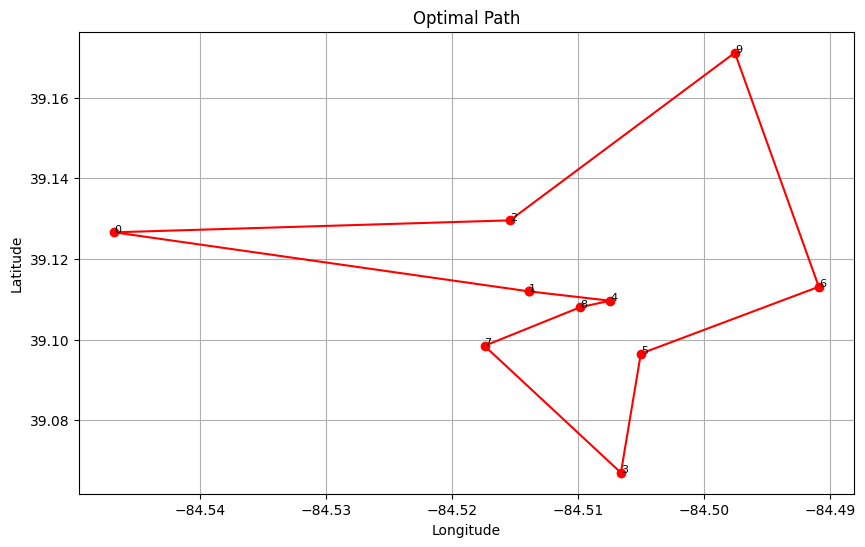

Population Size: 300
Number of Generations: 3000
Mutation Rate: 0.4
Crossover Rate: 0.95

Optimal Path: [1, 0, 2, 9, 6, 5, 3, 7, 8, 4]
Estimated Total Distance: 28012.63 meters


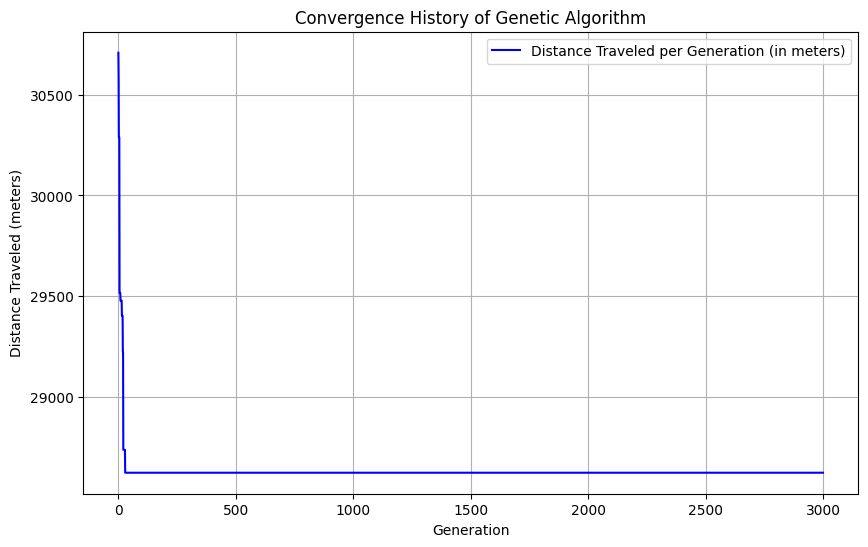

In [30]:
# Import necessary modules for the algorithm
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

# Set a random seed for reproducibility so that the same random sequences can be generated each time for comparison
random.seed(42)

# Function to load city coordinates from a CSV file and return a dictionary with city names as keys and coordinates as values
def load_city_coordinates(filename):
    data = pd.read_csv(filename)
    return {row[0]: (row[1], row[2]) for row in data.itertuples(index=False)}

# Function to calculate the haversine distance between two cities given their latitude and longitude
def haversine_distance(city1, city2):
    # Earth's radius in meters
    R = 6371.0 * 1000
    
    # Unpack latitude and longitude and convert them from degrees to radians
    lat1, lon1 = city1
    lat2, lon2 = city2
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Calculate haversine distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Function to create a random individual, i.e., a sequence of cities representing a route
def create_individual(city_keys):
    return random.sample(city_keys, len(city_keys))

# Function to mutate an individual by swapping two cities in the route
def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Function to perform crossover between two parent routes to produce a new route (child)
def crossover(parent1, parent2):
    # Choose two points to perform crossover
    idx1, idx2 = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[idx1:idx2] = parent1[idx1:idx2]
    child_pointer = 0
    # Fill in the rest of the child's route with cities from the second parent that aren't already in the child's route
    for gene in parent2:
        if gene not in child:
            while child[child_pointer] is not None:
                child_pointer += 1
            child[child_pointer] = gene
    return child

# Main function for the genetic algorithm
def genetic_algorithm(filename, population_size=100, num_generations=1000, mutation_rate=0.1, crossover_rate=0.8):
    # Load cities and their coordinates
    cities = load_city_coordinates(filename)
    city_keys = list(cities.keys())

    # Define a function to calculate the total distance of a route (used as the fitness function in this context)
    def tsp_distance(individual):
        total_distance = 0
        # Sum distances for all legs of the journey
        for i in range(len(individual) - 1):
            total_distance += haversine_distance(cities[individual[i]], cities[individual[i+1]])
        # Add the distance from the last city back to the first to complete the cycle
        total_distance += haversine_distance(cities[individual[-1]], cities[individual[0]])
        return total_distance

    # Initialize the population with random routes
    population = [create_individual(city_keys) for _ in range(population_size)]
    distance_history = []

    # Start the main loop of the genetic algorithm
    for generation in range(num_generations):
        # Sort the population by the distance of the route (ascending order)
        population = sorted(population, key=tsp_distance)
        # Select the top half of the routes to create new routes from
        new_population = population[:population_size // 2]
        
        # Generate new individuals (routes) to fill the rest of the population using crossover and mutation
        while len(new_population) < population_size:
            # Select two parents randomly
            parent1, parent2 = random.sample(population, 2)
            # Apply crossover and mutation to generate a new child route
            if random.random() < crossover_rate:
                child = crossover(parent1, parent2)
                if random.random() < mutation_rate:
                    child = mutate(child)
            else:
                child = parent1 if tsp_distance(parent1) < tsp_distance(parent2) else parent2
            new_population.append(child)

        # The new population becomes the current population for the next generation
        population = new_population
        
        # Record the shortest distance (best fitness) in this generation
        best_individual = population[0]
        best_distance = tsp_distance(best_individual)
        distance_history.append(best_distance)

    # Return the best route found, the city coordinates, and the history of best distances
    return sorted(population, key=tsp_distance)[0], cities, distance_history

# Function to plot the route on a map using matplotlib
def plot_route(best_individual, cities):
    # Add the starting city to the end of the route to create a closed loop for plotting
    optimal_route_cyclic = best_individual + [best_individual[0]]
    # Extract the x (longitude) and y (latitude) values for plotting
    x_values = [cities[city][1] for city in optimal_route_cyclic]  # Swapped x and y here for longitude
    y_values = [cities[city][0] for city in optimal_route_cyclic]  # Swapped x and y here for latitude
    
    # Plotting the route
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, 'ro-')  # 'ro-' specifies red color, circle markers, and solid lines
    # Annotate each city with its name
    for city, (lat, lon) in cities.items():
        plt.text(lon, lat, city, fontsize=8)  # Swapped the order here for longitude and latitude
    plt.title("Optimal Path")
    plt.xlabel("Longitude")  # Correct axis label for longitude
    plt.ylabel("Latitude")  # Correct axis label for latitude
    plt.grid(True)  # Enable grid for easier readability
    plt.show()

# Configuration parameters and execution of the genetic algorithm
filename = "Cincinnati.csv"
population_size = 300
num_generations = 3000
mutation_rate = 0.4
crossover_rate = 0.95

# Running the genetic algorithm to find the best route
best_individual, cities, distance_history = genetic_algorithm(filename, population_size, num_generations, mutation_rate, crossover_rate)
# Plotting the optimal route found by the genetic algorithm
plot_route(best_individual, cities)

# Calculate the total distance of the optimal route
total_distance = sum(haversine_distance(cities[best_individual[i]], cities[best_individual[i+1]]) for i in range(len(best_individual)-1))

# Print algorithm parameters and results
print("Population Size:", population_size)
print("Number of Generations:", num_generations)
print("Mutation Rate:", mutation_rate)
print("Crossover Rate:", crossover_rate)
print("\nOptimal Path:", best_individual)
print("Estimated Total Distance: {:.2f} meters".format(total_distance))

# Plotting the convergence history of the algorithm (distance vs. number of iterations)
plt.figure(figsize=(10, 6))
plt.plot(distance_history, 'b-', label='Distance Traveled per Generation (in meters)')
plt.title('Convergence History of Genetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('Distance Traveled (meters)')
plt.legend()  # Show legend to label the plot
plt.grid(True)  # Enable grid for easier readability
plt.show()

#### Combining the greedy and genetic to make it more computationally efficient by using the greedy algorithm to generate an initial population : Results for Atlanta

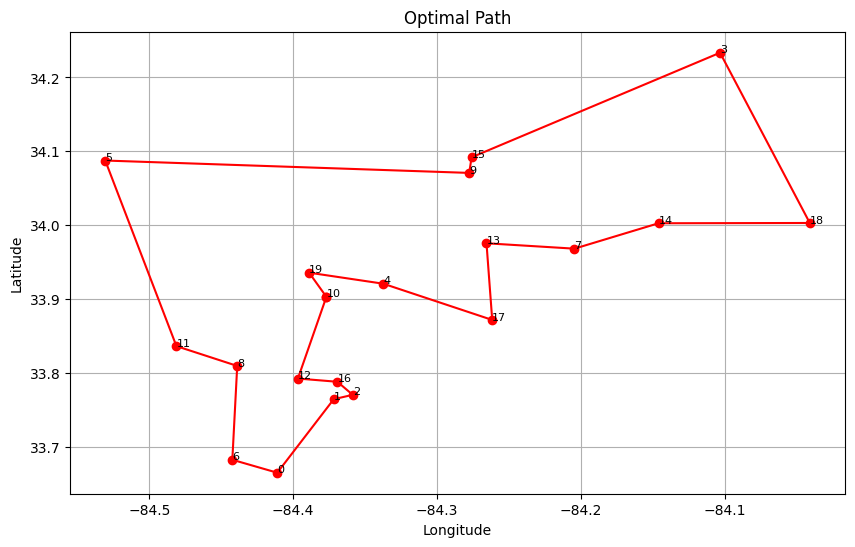

Population Size: 300
Number of Generations: 1000
Mutation Rate: 0.4
Crossover Rate: 0.95

Optimal Path: [10, 19, 4, 17, 13, 7, 14, 18, 3, 15, 9, 5, 11, 8, 6, 0, 1, 2, 16, 12]
Estimated Total Distance: 194103.40 meters


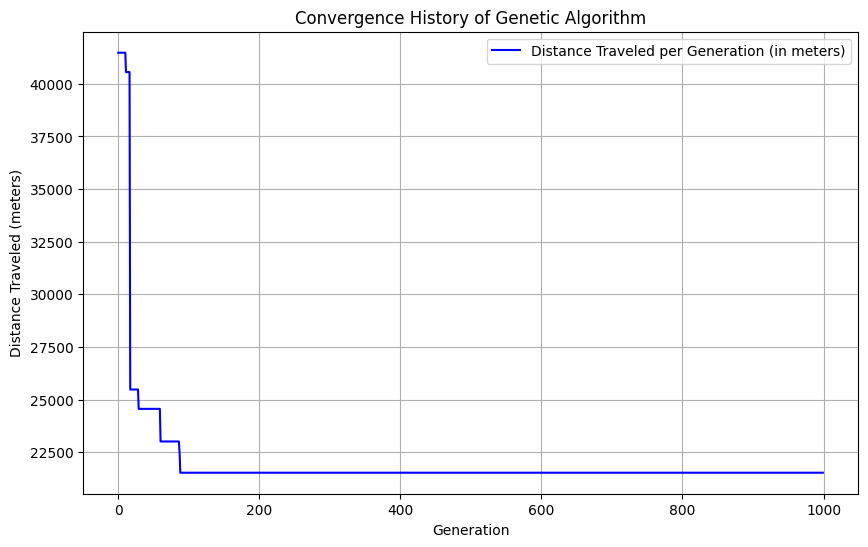

In [31]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

random.seed(42)

def load_city_coordinates(filename):
    data = pd.read_csv(filename)
    return {row[0]: (row[1], row[2]) for row in data.itertuples(index=False)}

def haversine_distance(city1, city2):
    R = 6371.0 * 1000
    lat1, lon1 = city1
    lat2, lon2 = city2
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

def create_greedy_individual(city_keys, cities):
    start_city = random.choice(city_keys)
    route = [start_city]
    remaining_cities = set(city_keys) - set(route)
    current_city = start_city
    while remaining_cities:
        next_city = min(remaining_cities, key=lambda city: haversine_distance(cities[current_city], cities[city]))
        route.append(next_city)
        remaining_cities.remove(next_city)
        current_city = next_city
    return route

def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

def crossover(parent1, parent2):
    idx1, idx2 = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[idx1:idx2] = parent1[idx1:idx2]
    for gene in parent2:
        if gene not in child:
            child_pointer = child.index(None)
            child[child_pointer] = gene
    return child

def genetic_algorithm(filename, target_distance, population_size=100, num_generations=1000, mutation_rate=0.1, crossover_rate=0.8):
    cities = load_city_coordinates(filename)
    city_keys = list(cities.keys())

    def tsp_distance(individual):
        total_distance = sum(haversine_distance(cities[individual[i]], cities[individual[i+1]]) for i in range(len(individual) - 1)) + \
                         haversine_distance(cities[individual[-1]], cities[individual[0]])
        return abs(total_distance - target_distance)  # Modify to minimize the difference from the target distance

    population = [create_greedy_individual(city_keys, cities) for _ in range(population_size)]
    distance_history = []

    for generation in range(num_generations):
        population.sort(key=tsp_distance)
        new_population = population[:population_size // 2]
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(population, 2)
            if random.random() < crossover_rate:
                child = crossover(parent1, parent2)
                if random.random() < mutation_rate:
                    child = mutate(child)
            else:
                child = min([parent1, parent2], key=tsp_distance)
            new_population.append(child)
        population = new_population
        best_individual = population[0]
        best_distance = tsp_distance(best_individual)
        distance_history.append(best_distance)

    return sorted(population, key=tsp_distance)[0], cities, distance_history

filename = "Atlanta.csv"
target_distance = 185000  # 185 km converted to meters
population_size = 300
num_generations = 1000
mutation_rate = 0.4
crossover_rate = 0.95

best_individual, cities, distance_history = genetic_algorithm(filename, target_distance, population_size, num_generations, mutation_rate, crossover_rate)
plot_route(best_individual, cities)

print("Population Size:", population_size)
print("Number of Generations:", num_generations)
print("Mutation Rate:", mutation_rate)
print("Crossover Rate:", crossover_rate)
print("\nOptimal Path:", best_individual)
print("Estimated Total Distance: {:.2f} meters".format(sum(haversine_distance(cities[best_individual[i]], cities[best_individual[i+1]]) for i in range(len(best_individual)-1))))
plt.figure(figsize=(10, 6))
plt.plot(distance_history, 'b-', label='Distance Traveled per Generation (in meters)')
plt.title('Convergence History of Genetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('Distance Traveled (meters)')
plt.legend()
plt.grid(True)
plt.show()
